In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_excel('data.xlsx')
data.head(5)

,Timestamp,Full Name,Registration Number,Gmail I'D,Gender,Year Of Studying,Hobbies [Reading],Hobbies [Writing],Hobbies [Singing],Hobbies [Dancing],...,Name 3,Registration Number 3,If the above answer is zero please mention why,Name 1.1,Registeration Number 1,Name 2.1,Registeration Number 2,Name 3.1,Registeration Number 3,If the above answer is zero please mention why.1
0,2020-03-02 09:25:58.859,Anamitra Bhar,RA1811003010684,anamitra.bhar@gmail.com,Male,II Year,Yes,Yes,NO,NO,...,NaN,NaN,Don't have any friends,NaN,NaN,NaN,NaN,NaN,NaN,Don't have any friends
1,2020-03-02 09:26:03.326,Shivam Khandelwal,RA1811003010605,shivamkhandelwal_ra@srmuniv.edu.in,Male,II Year,Yes,NO,NO,NO,...,NaN,NaN,Not preffered to say,NaN,NaN,NaN,NaN,NaN,NaN,Not preffered to say
2,2020-03-02 09:26:55.850,Vibhav Sinha,RA1811003010677,vibhav.sinha@hotmail.com,Male,II Year,NO,NO,NO,NO,...,NaN,NaN,Not preffered to say,NaN,NaN,NaN,NaN,NaN,NaN,Not preffered to say
3,2020-03-02 09:27:18.002,Janhavi,RA1811003010659,jj9801@srmist.edu.in,Female,II Year,Yes,Yes,Yes,Yes,...,NaN,NaN,Don't have any friends,NaN,NaN,NaN,NaN,NaN,NaN,Don't have any friends
4,2020-03-02 09:27:18.754,Utkarsh Akhouri,RA1811003010679,uakhouri2000@gmail.com,Male,II Year,NO,NO,NO,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Don't have any friends


In [3]:
def create_graph():
    G=nx.Graph()
    for i in range(0,len(data)):
        G.add_node(i)
    return G

In [4]:
def assign_rn(G):
    for each in range(0,len(G.nodes())):
        k = data['Registration Number'][each]
        k = k[12:15]
        G.node[each]['name']= k
        G.node[each]['type']='person'

In [5]:
def get_labels(G):
    dict1={}
    for each in G.nodes():
        dict1[each]=G.node[each]['name']
    return dict1

In [6]:
def visualize1(G):
    nx.circular_layout(G)
    nx.draw(G,with_labels=True)
    plt.show()

In [7]:
def visualize2(G,labeldict):
    nx.circular_layout(G)
    nx.draw(G,labels=labeldict)
    plt.show()

In [8]:
def visualize3(G,labeldict,nodesize,color):
    nx.circular_layout(G)
    nx.draw(G,labels=labeldict,node_size=nodesize,node_color=color)
    plt.show()

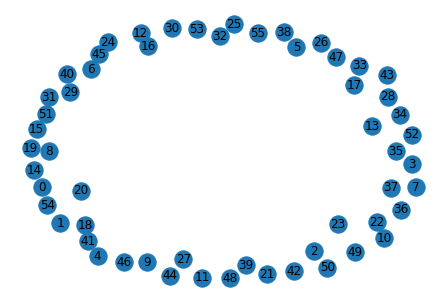

In [9]:
G=create_graph()
visualize1(G)

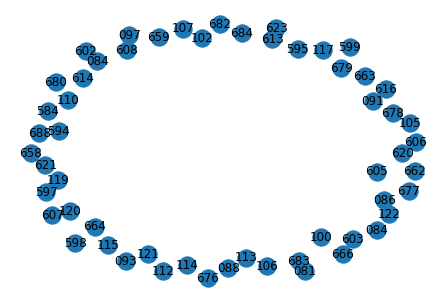

In [10]:
assign_rn(G)
labeldict=get_labels(G)
visualize2(G,labeldict)

In [11]:
def add_foci_nodes1(G):
    n=G.number_of_nodes()
    i=n+1
    foci_nodes=['reading','writing','singing','dancing','games','art work','movies']
    for j in range(0,7):
        G.add_node(i)
        G.node[i]['name']=foci_nodes[j]
        G.node[i]['type']='foci1'
        i=i+1 

In [12]:
def get_colors1(G):
    c=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            c.append('red')
        else:
            if G.node[each]['type']=='foci1':
                if G.node[each]['name']=='reading':
                    c.append('blue')
                elif G.node[each]['name']=='writing':
                    c.append('grey')
                elif G.node[each]['name']=='singing':
                    c.append('orange')
                elif G.node[each]['name']=='dancing':
                    c.append('purple')
                elif G.node[each]['name']=='games':
                    c.append('pink')
                elif G.node[each]['name']=='art work':
                    c.append('green')
                elif G.node[each]['name']=='movies':
                    c.append('yellow')
                
    return c

In [13]:
def get_size(G):
    array2=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            array2.append(300)
        else:
            array2.append(1000)
    return array2

In [14]:
def get_size2(G):
    array2=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            array2.append(100)
        else:
            array2.append(400)
    return array2

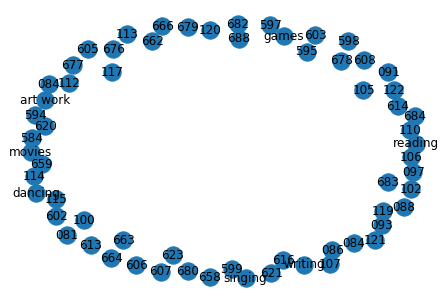

In [15]:
add_foci_nodes1(G)
labeldict=get_labels(G)
nodesize=get_size(G)
visualize2(G,labeldict)

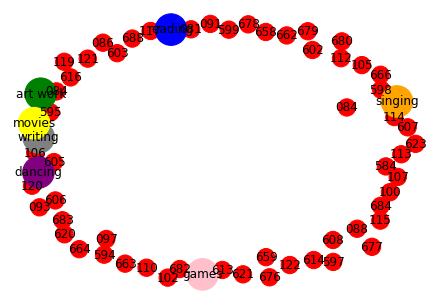

In [16]:
color_array=get_colors1(G)
visualize3(G,labeldict,nodesize,color_array)

In [17]:
def get_foci_nodes1():
    f=[]
    for each in G.nodes():
        if G.node[each]['type']=='foci1':
            f.append(each)
    return f

In [18]:
def get_foci_nodes2():
    f=[]
    for each in G.nodes():
        if G.node[each]['type']=='foci2':
            f.append(each)
    return f

In [19]:
def get_persons_nodes():
    p=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            p.append(each)
    return p

In [20]:
def add_foci_edges1():
    foci_nodes = get_foci_nodes1()
    people_nodes = get_persons_nodes()
    for each in range(0,len(data)):
        if data['Hobbies [Reading]'][each]=='Yes':
            G.add_edge(each,foci_nodes[0])
        if data['Hobbies [Writing]'][each]=='Yes':
            G.add_edge(each,foci_nodes[1])
        if data['Hobbies [Singing]'][each]=='Yes':
            G.add_edge(each,foci_nodes[2])
        if data['Hobbies [Dancing]'][each]=='Yes':
            G.add_edge(each,foci_nodes[3])
        if data['Hobbies [Playing Games]'][each]=='Yes':
            G.add_edge(each,foci_nodes[4])
        if data['Hobbies [Art Work]'][each]=='Yes':
            G.add_edge(each,foci_nodes[5])
        if data['Hobbies [Movies]'][each]=='Yes':    
            G.add_edge(each,foci_nodes[6])
        visualize3(G,labeldict,nodesize,color_array)

C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


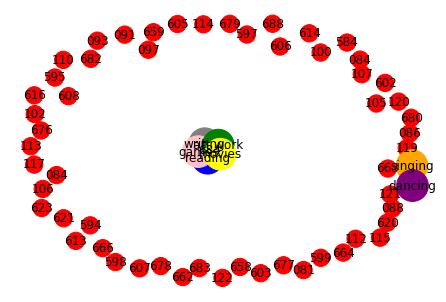

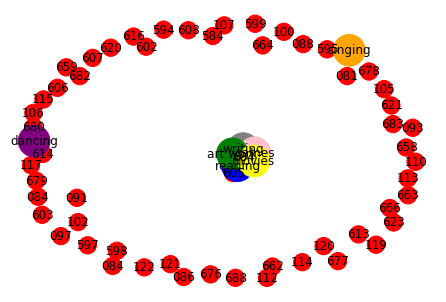

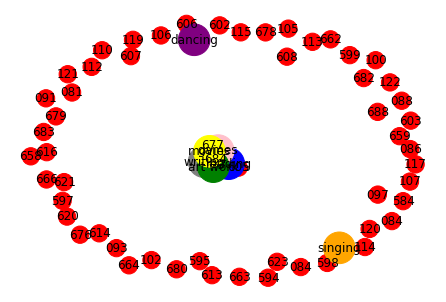

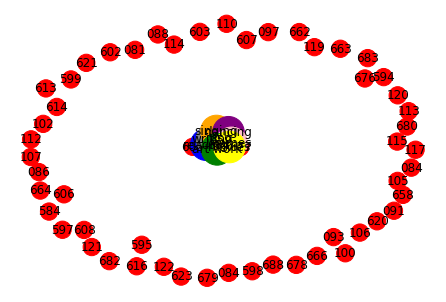

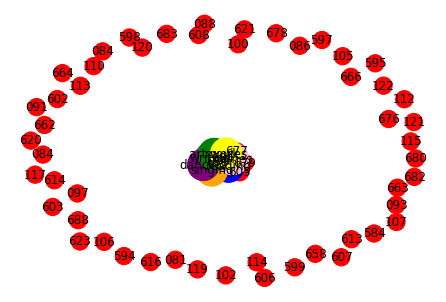

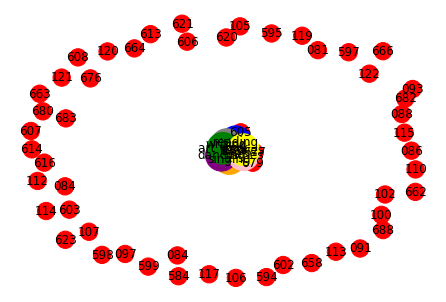

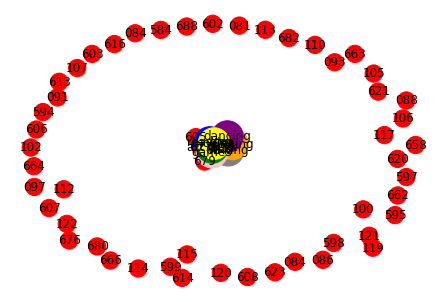

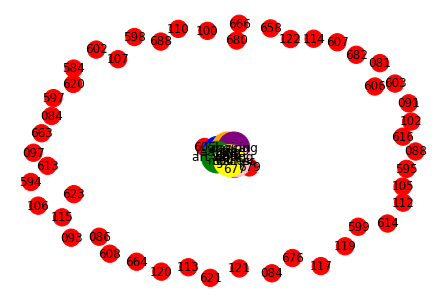

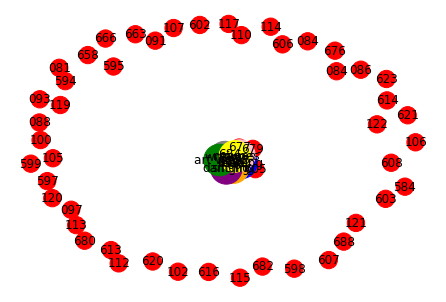

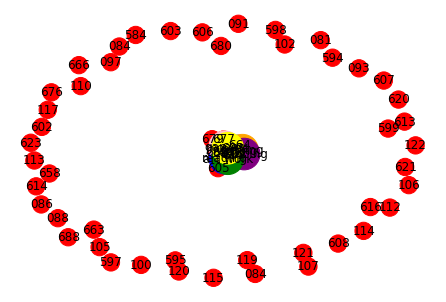

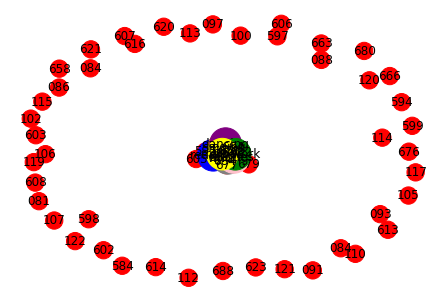

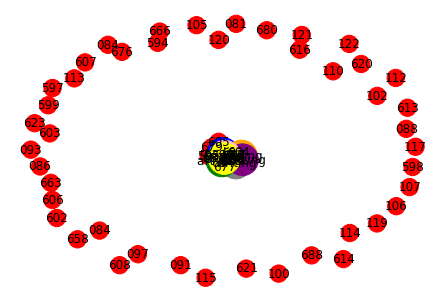

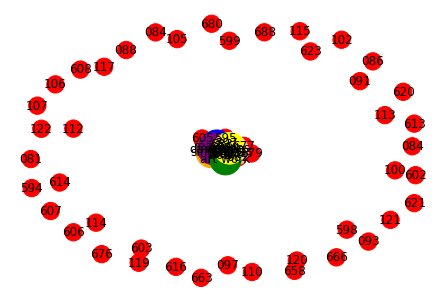

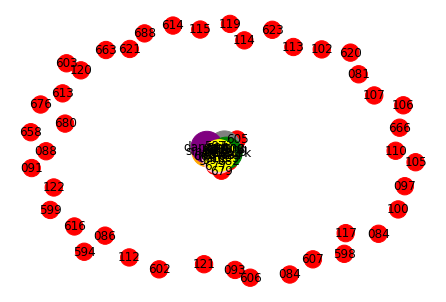

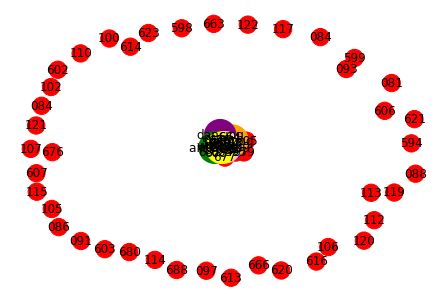

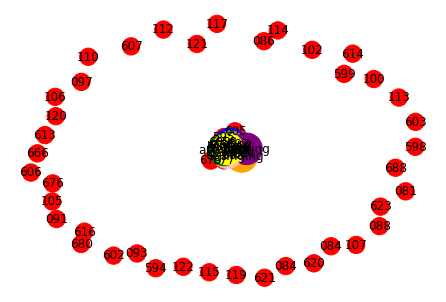

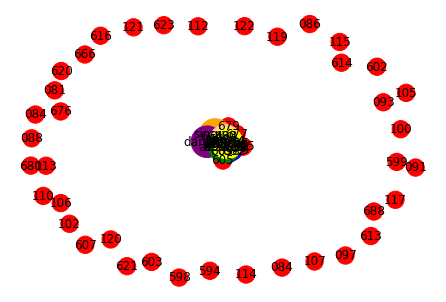

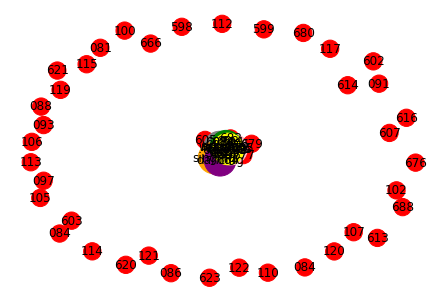

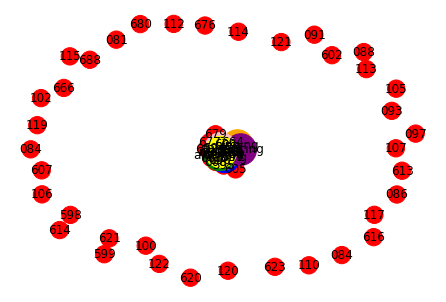

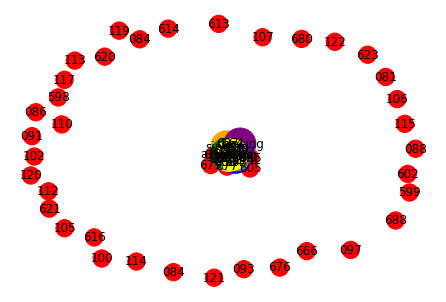

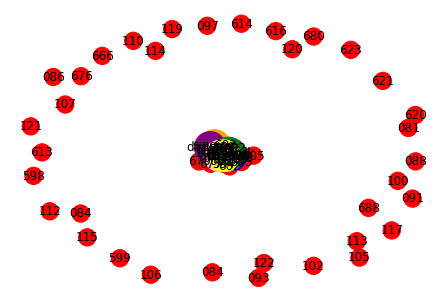

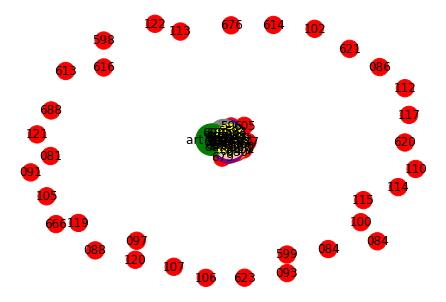

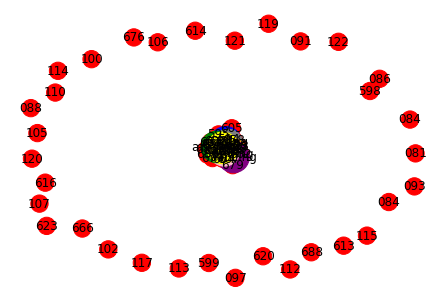

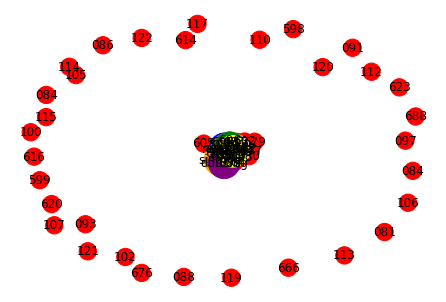

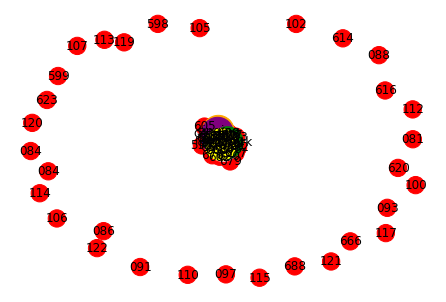

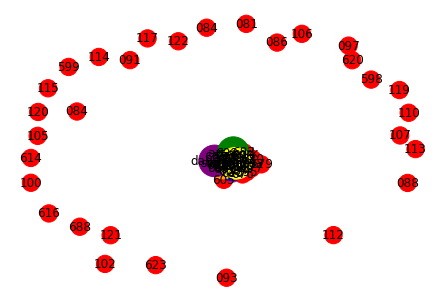

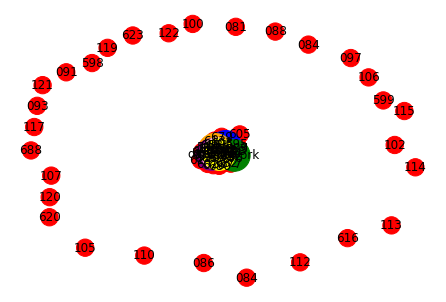

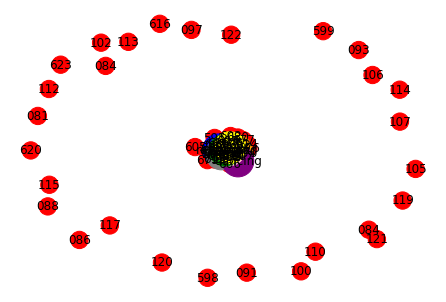

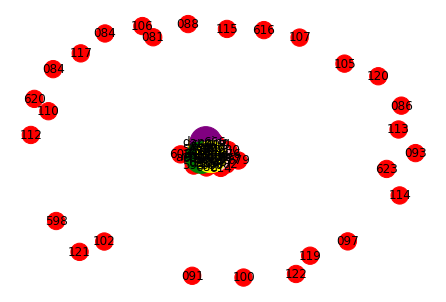

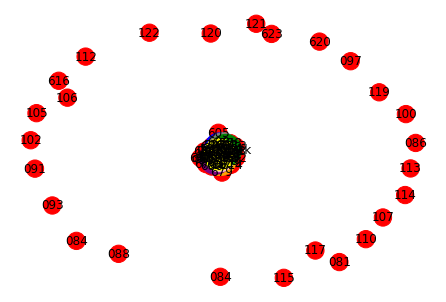

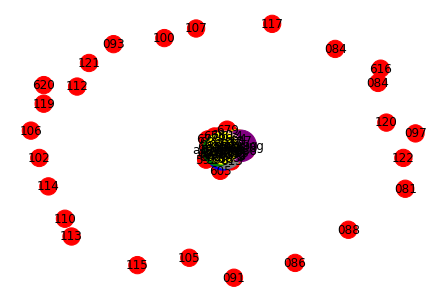

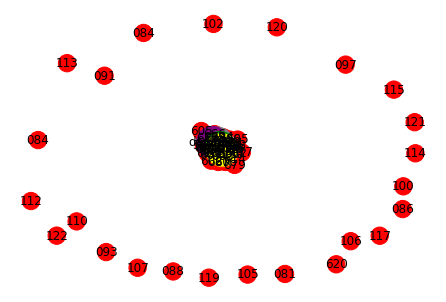

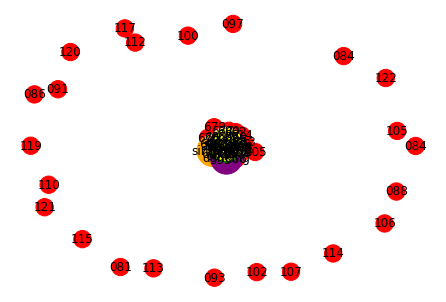

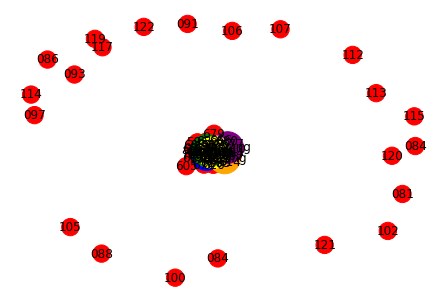

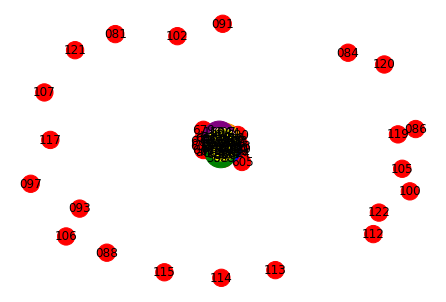

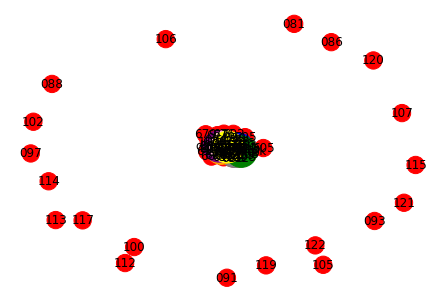

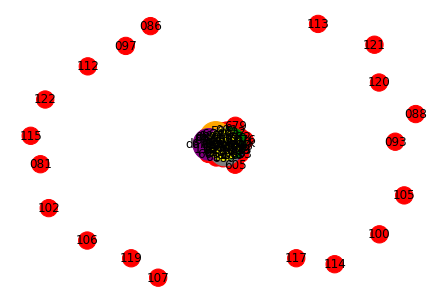

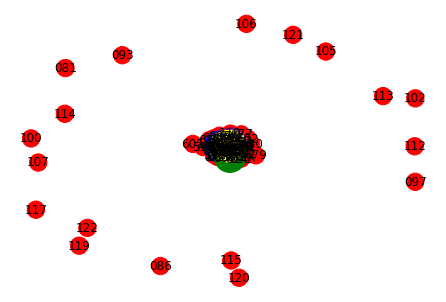

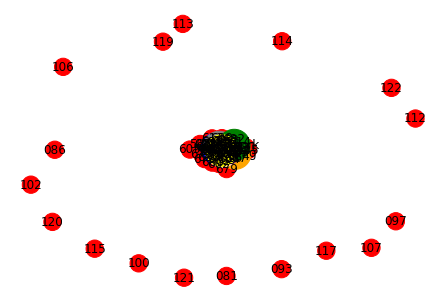

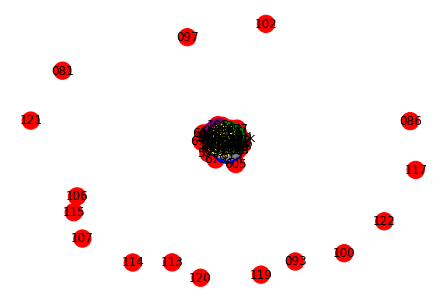

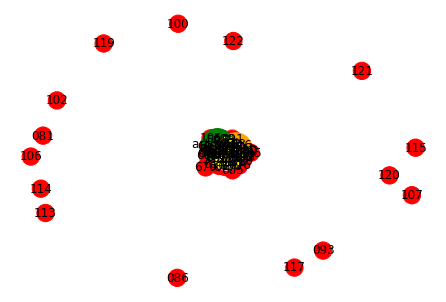

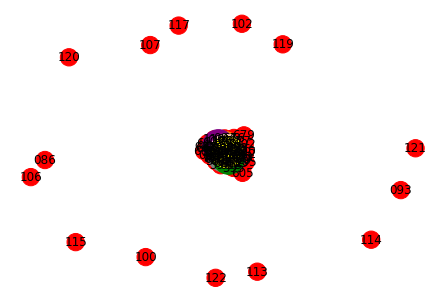

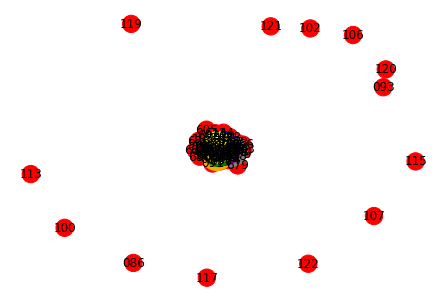

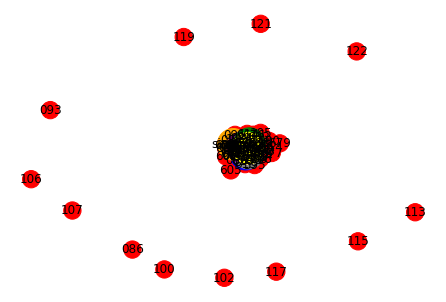

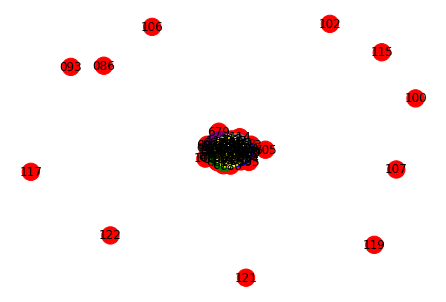

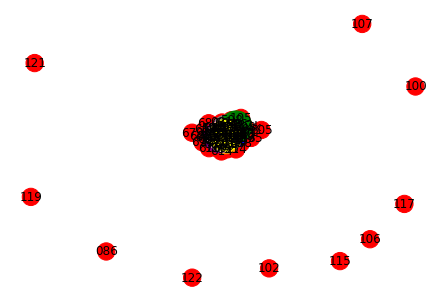

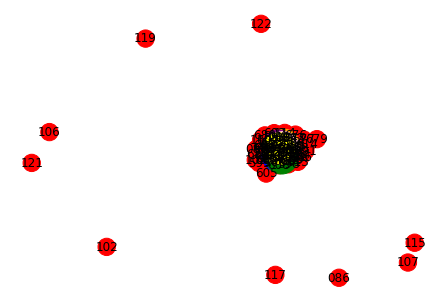

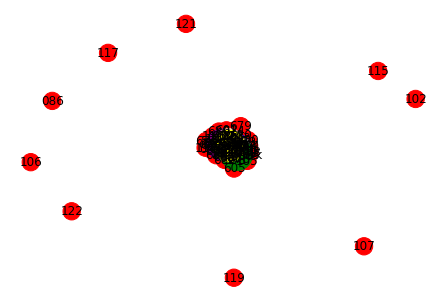

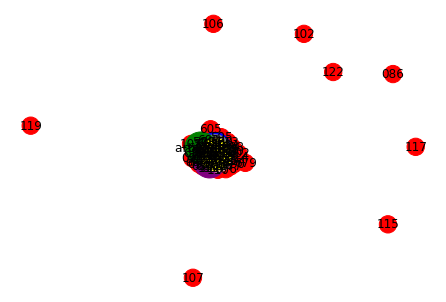

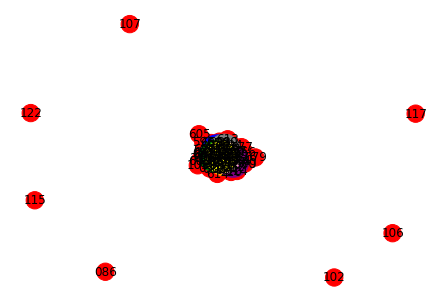

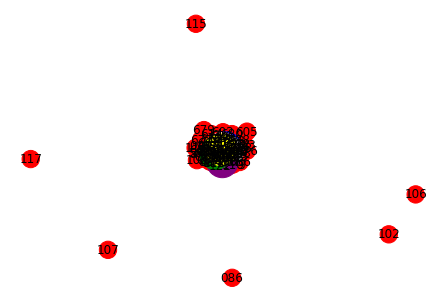

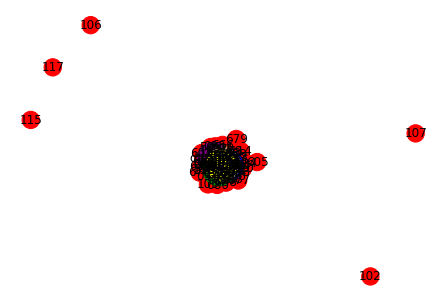

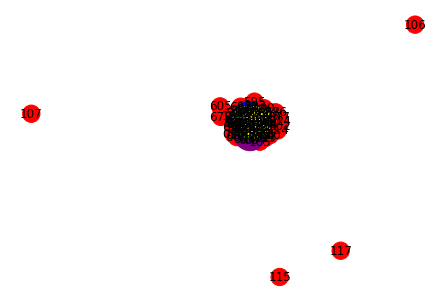

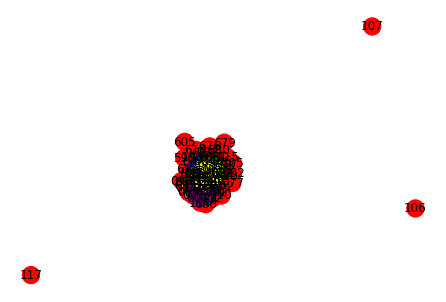

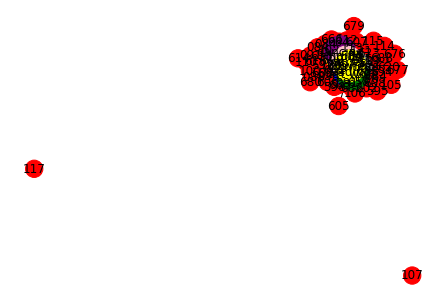

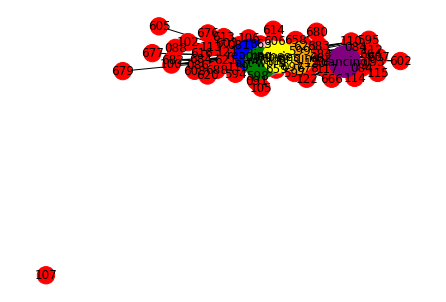

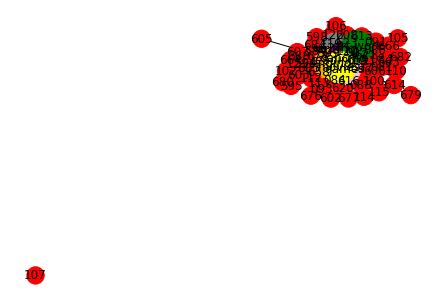

In [21]:
add_foci_edges1()
visualize3(G,labeldict,nodesize,color_array)

In [22]:
def homophily1(G):
    f = open("Hobbies.txt","w")
    pnodes=get_persons_nodes()
    fnodes=get_foci_nodes1()
    for u in pnodes:
        for v in pnodes:
            if u != v:
                for w in fnodes:
                    if G.has_edge(u,w) and G.has_edge(v,w) :
                        G.add_edge(u,v)
                        str = "Reg no " + data['Registration Number'][u] + " and "+ data['Registration Number'][v] + " can be friends based on hobbies.\n"
                        f.write(str)
    f.close()

In [23]:
homophily1(G)


Homophily based on hobbies



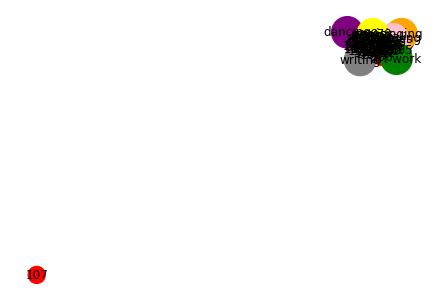

In [24]:
print("\nHomophily based on hobbies\n")
visualize3(G,labeldict,nodesize,color_array)

In [25]:
def add_foci_nodes2(G):
    n=G.number_of_nodes()
    i=n+1
    foci_nodes=['programming','database','cyber security','web design','AI','machine learning']
    for j in range(0,6):
        G.add_node(i)
        G.node[i]['name']=foci_nodes[j]
        G.node[i]['type']='foci2'
        i=i+1 

In [26]:
def get_colors2(G):
    c=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            c.append('red')
        else:
            if G.node[each]['type']=='foci2':
                if G.node[each]['name']=='programming':
                    c.append('blue')
                elif G.node[each]['name']=='database':
                    c.append('grey')
                elif G.node[each]['name']=='cyber security':
                    c.append('orange')
                elif G.node[each]['name']=='web design':
                    c.append('purple')
                elif G.node[each]['name']=='AI':
                    c.append('pink')
                elif G.node[each]['name']=='machine learning':
                    c.append('green')             
    return c

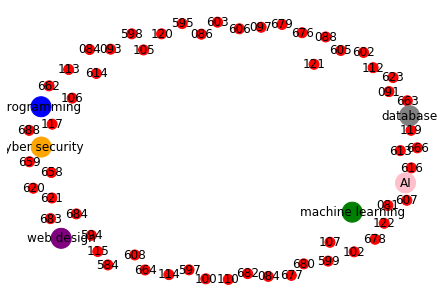

In [27]:
G=create_graph()
assign_rn(G)
add_foci_nodes2(G)
labeldict=get_labels(G)
color_array2=get_colors2(G)
nodesize=get_size2(G)
visualize3(G,labeldict,nodesize,color_array2)

In [28]:
def add_foci_edges2():
    foci_nodes = get_foci_nodes2()
    people_nodes = get_persons_nodes()
    for each in range(0,len(data)):
        if data['Area of Interest [Programming]'][each]=='Yes':
            G.add_edge(each,foci_nodes[0])
        if data['Area of Interest [Database]'][each]=='Yes':
            G.add_edge(each,foci_nodes[1])
        if data['Area of Interest [Cyber Security]'][each]=='Yes':
            G.add_edge(each,foci_nodes[2])
        if data['Area of Interest [Web Designing]'][each]=='Yes':
            G.add_edge(each,foci_nodes[3])
        if data['Area of Interest [AI]'][each]=='Yes':
            G.add_edge(each,foci_nodes[4])
        if data['Area of Interest [Machine Learning]'][each]=='Yes':
            G.add_edge(each,foci_nodes[5])
        visualize3(G,labeldict,nodesize,color_array2)

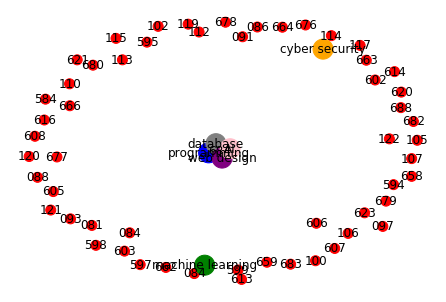

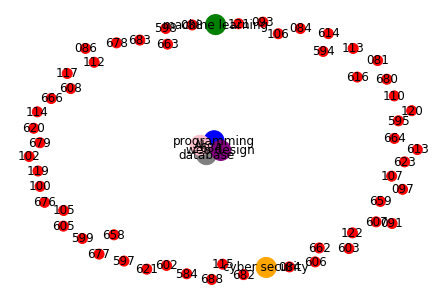

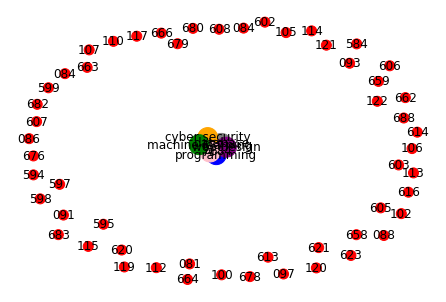

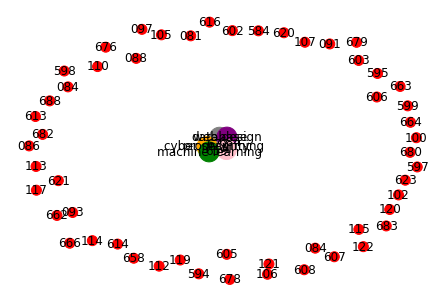

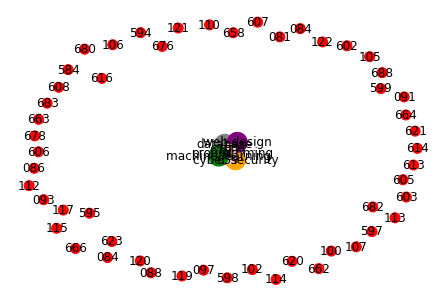

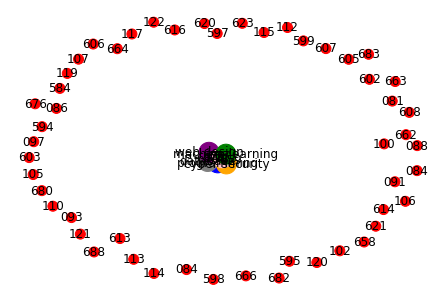

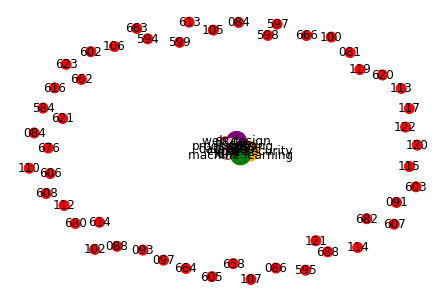

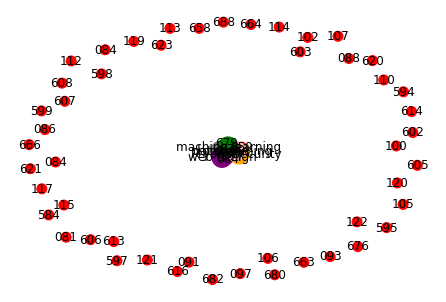

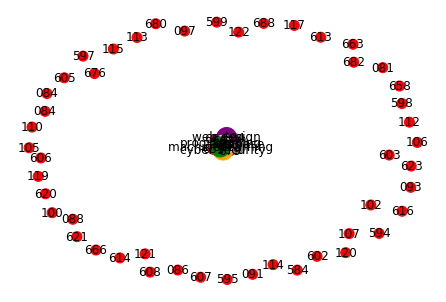

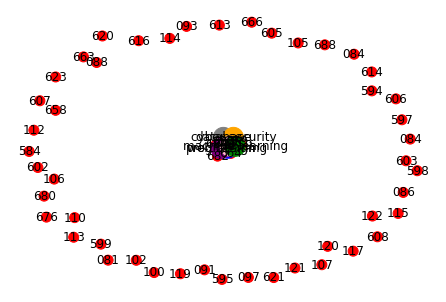

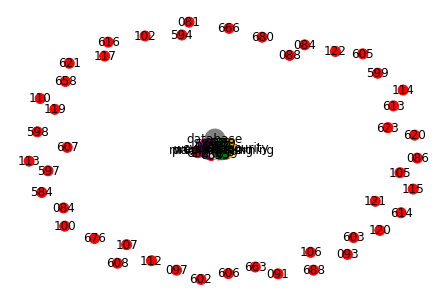

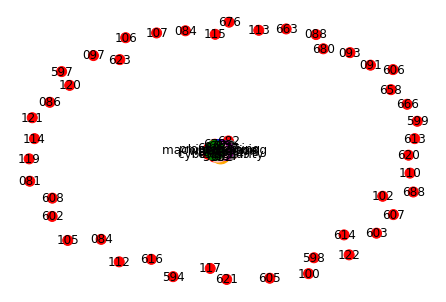

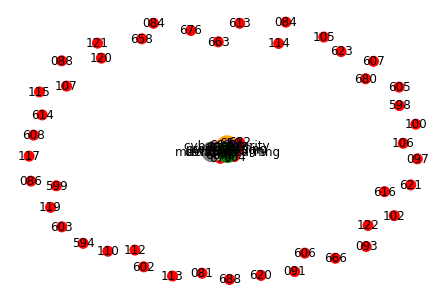

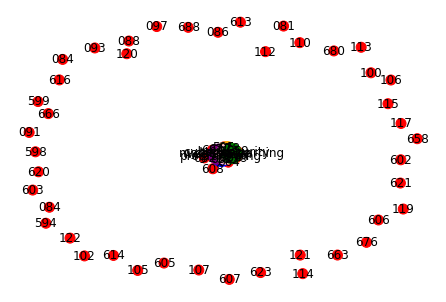

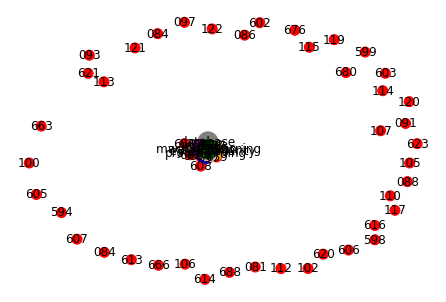

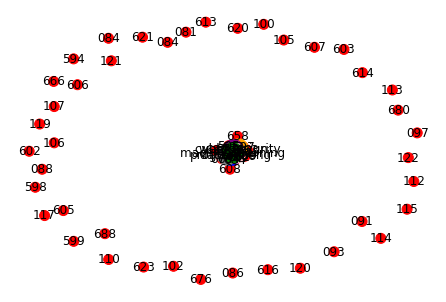

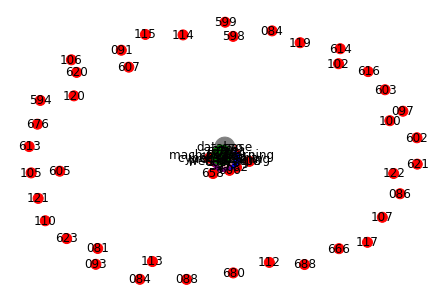

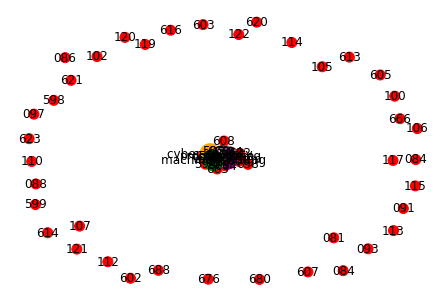

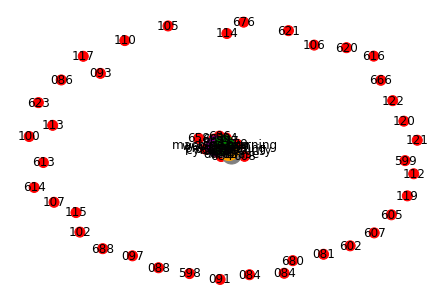

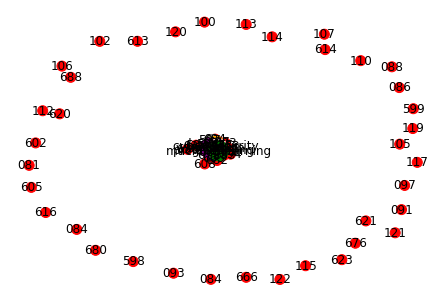

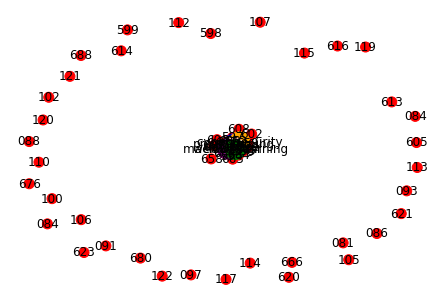

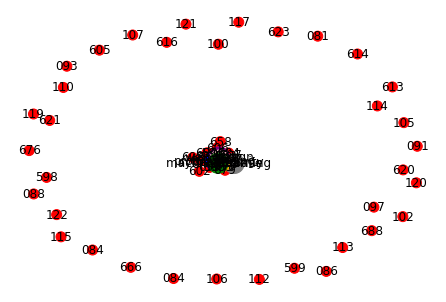

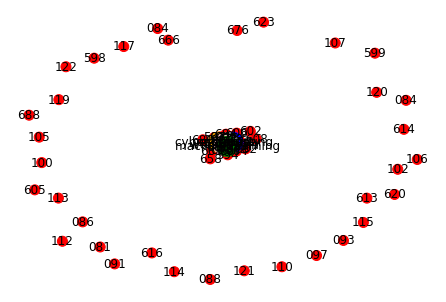

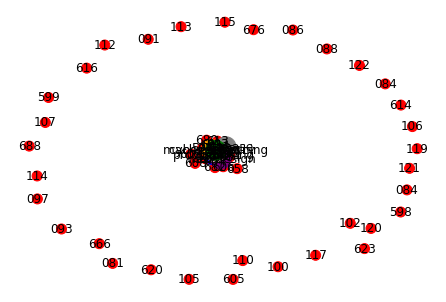

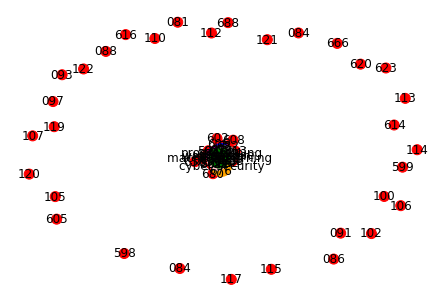

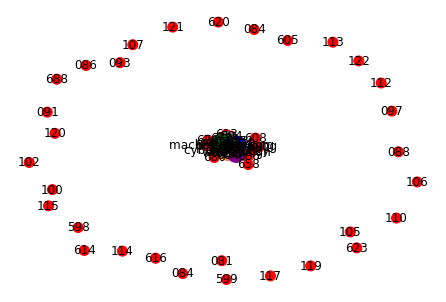

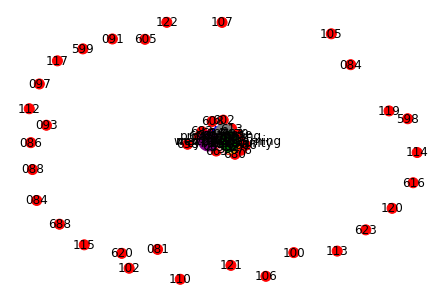

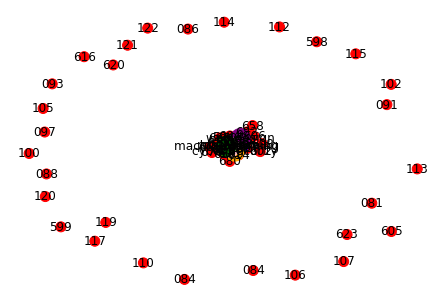

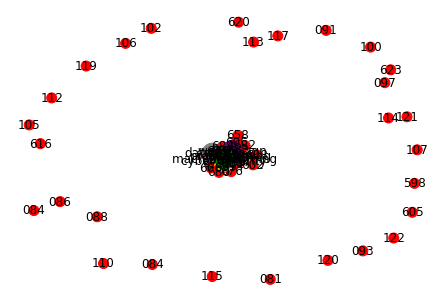

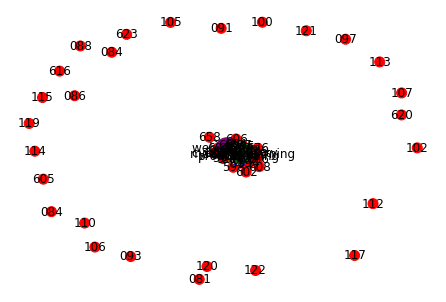

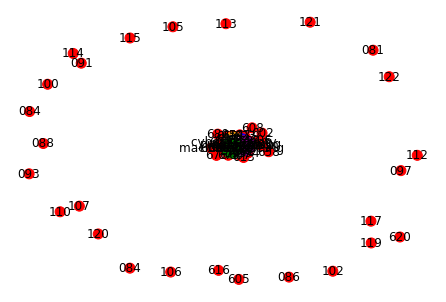

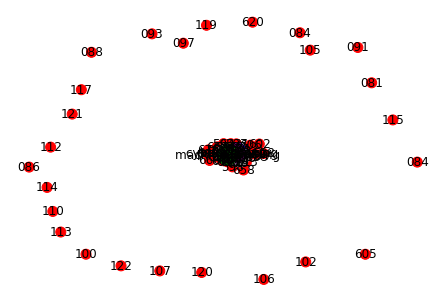

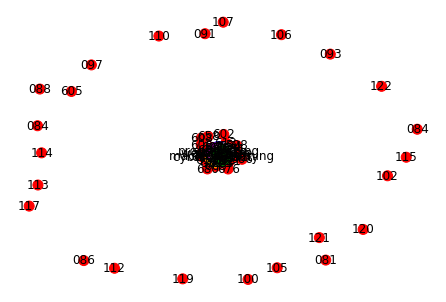

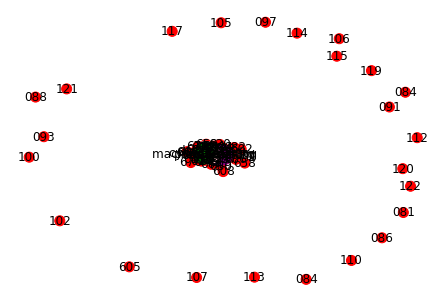

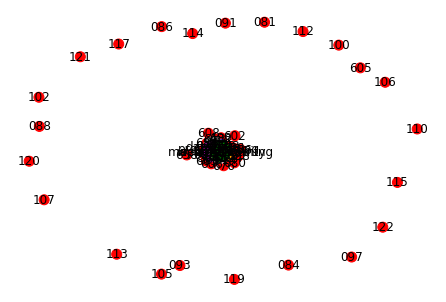

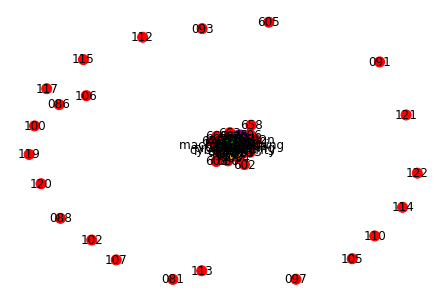

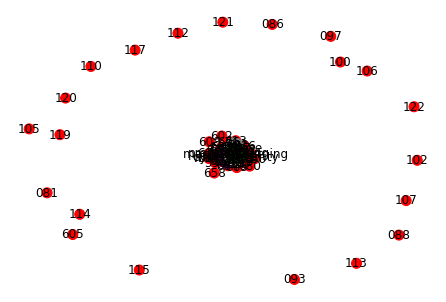

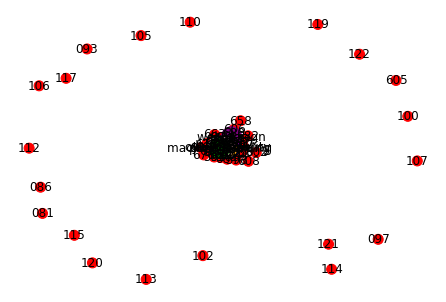

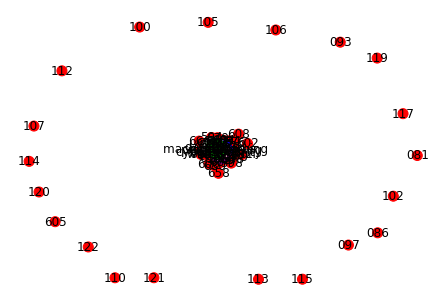

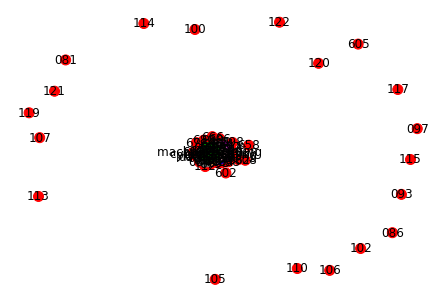

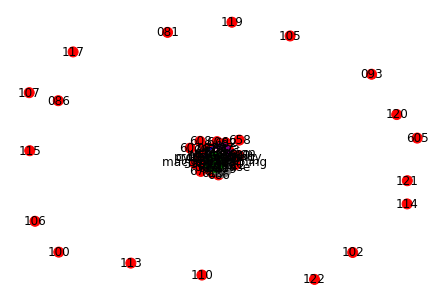

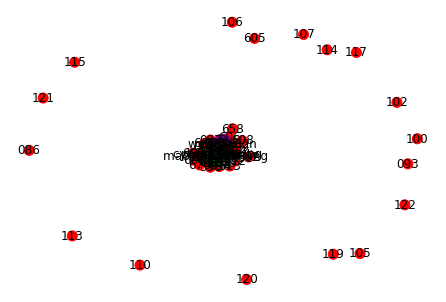

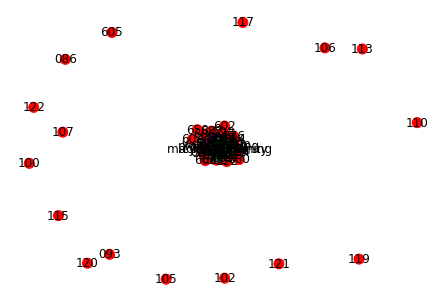

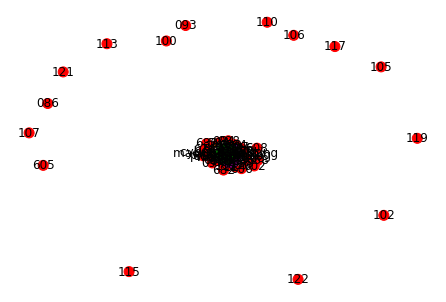

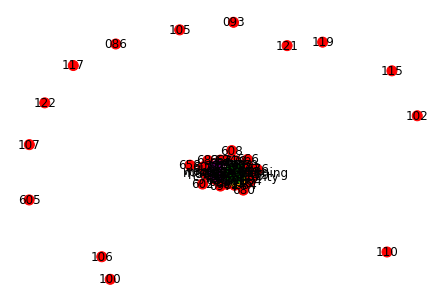

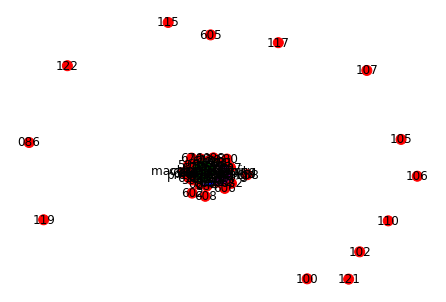

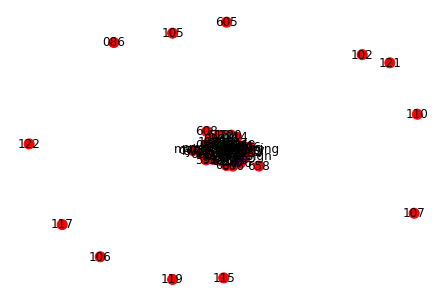

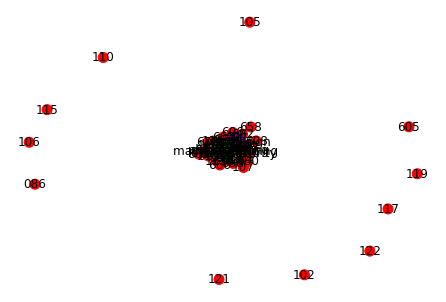

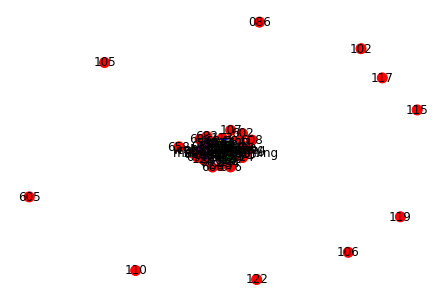

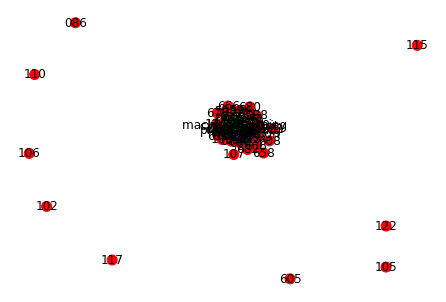

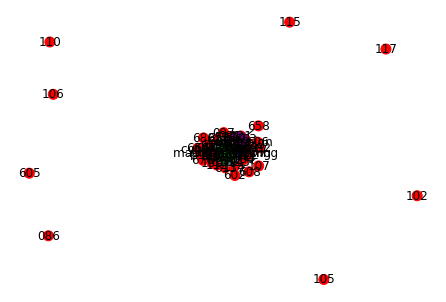

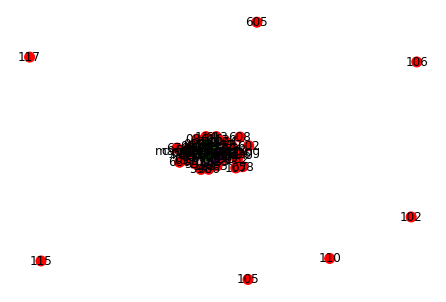

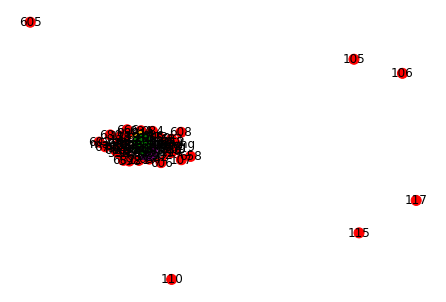

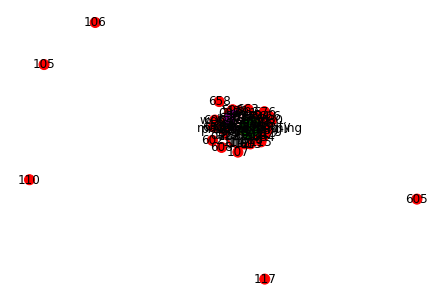

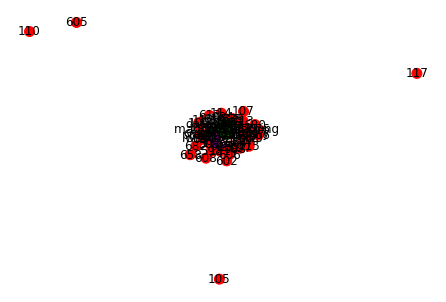

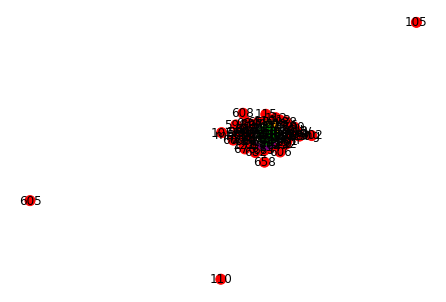

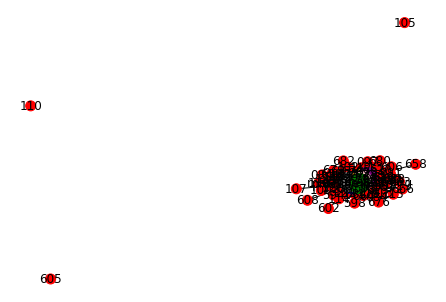

In [29]:
add_foci_edges2()
visualize3(G,labeldict,nodesize,color_array2)

In [30]:
def homophily2(G):
    pnodes=get_persons_nodes()
    fnodes=get_foci_nodes2()
    f=open("Technology.txt","w")
    for u in pnodes:
        for v in pnodes:
            if u != v:
                for w in fnodes:
                    if G.has_edge(u,w) and G.has_edge(v,w) :
                        G.add_edge(u,v)
                        str = "Reg no " + data['Registration Number'][u] + " and "+ data['Registration Number'][v] + " can be friends based on technological interests.\n"
                        f.write(str)
    f.close()

In [31]:
homophily2(G)


Homophily based on technical interests



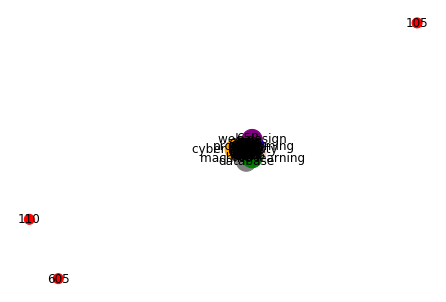

In [32]:
print("\nHomophily based on technical interests\n")
visualize3(G,labeldict,nodesize,color_array2)